In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
import LE3_GC_ProductReader as pr
import pandas
from scipy.special import eval_legendre

In [2]:
def xi(xml_file):
    for file in xml_file:
        Product_TwoPoint = pr.DpdLE3GCReader()
        Product_TwoPoint.parse_xml(file)
        Product_TwoPoint.read_tables()
        file_name=Product_TwoPoint.CorrelationMultipole.header['D_NAME'].removesuffix('.fits')

        bin2num=Product_TwoPoint.Pairs.header["BIN2NUM"]
        bin1num=Product_TwoPoint.Pairs.header["BIN1NUM"]

        
        pair_DD=Product_TwoPoint.Pairs.header["PAIR_DD"]
        pair_RR=Product_TwoPoint.Pairs.header["PAIR_RR"]
        pair_DR=Product_TwoPoint.Pairs.header["PAIR_DR"]

        DD = np.reshape(Product_TwoPoint.Pairs.table["DD"], newshape=(bin1num,bin2num))
        DR = np.reshape(Product_TwoPoint.Pairs.table["DR"], newshape=(bin1num,bin2num))
        RR = np.reshape(Product_TwoPoint.Pairs.table["RR"], newshape=(bin1num,bin2num))

        r = Product_TwoPoint.CorrelationMultipole.table['SCALE']
        mu = np.array(Product_TwoPoint.Correlation.table['SCALE_2D']).reshape(bin1num, bin2num)
        xi2D = np.array(Product_TwoPoint.Correlation.table['XI']).reshape(bin1num,bin2num)
        xi0 = Product_TwoPoint.CorrelationMultipole.table['XI0']      
        xi2 = Product_TwoPoint.CorrelationMultipole.table['XI2']
        xi4 = Product_TwoPoint.CorrelationMultipole.table['XI4']
       
       
    return r,xi0

First of all, I compare the xi obtained in the North and South Catalogs with differents weights: no weights, all systematic weights, systematic weights and fkp

In [3]:
#South low

pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_South/low/EUC_LE3_GCL_2PCF_BOSS_SOUTH_low_none_Correlation_AUTO_2DPOL_809DB0C6504B_20240706T105737.0Z.xml'
xml_file = glob.glob(pathname)
print(xml_file)
r_none_low_S,xi0_none_low_S = xi(xml_file)

pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_South/low/EUC_LE3_GCL_2PCF_BOSS_SOUTH_low_wtot_Correlation_AUTO_2DPOL_9C307997DB7E_20240706T112231.0Z.xml'
xml_file = glob.glob(pathname)
print(xml_file)
r_sys_low_S,xi0_sys_low_S = xi(xml_file)

pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_South/low/EUC_LE3_GCL_2PCF_BOSS_SOUTH_low_totfkp_Correlation_AUTO_2DPOL_7D4740367B95_20240715T115701.0Z.xml'
xml_file = glob.glob(pathname)
print(xml_file)
r_tot_low_S,xi0_tot_low_S = xi(xml_file)

['/farmdisk1/lentini/Work/Project/xi/BOSS_South/low/EUC_LE3_GCL_2PCF_BOSS_SOUTH_low_none_Correlation_AUTO_2DPOL_809DB0C6504B_20240706T105737.0Z.xml']
['/farmdisk1/lentini/Work/Project/xi/BOSS_South/low/EUC_LE3_GCL_2PCF_BOSS_SOUTH_low_wtot_Correlation_AUTO_2DPOL_9C307997DB7E_20240706T112231.0Z.xml']
['/farmdisk1/lentini/Work/Project/xi/BOSS_South/low/EUC_LE3_GCL_2PCF_BOSS_SOUTH_low_totfkp_Correlation_AUTO_2DPOL_7D4740367B95_20240715T115701.0Z.xml']


In [4]:
#South high

pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_South/high/EUC_LE3_GCL_2PCF_BOSS_SOUTH_high_none_Correlation_AUTO_2DPOL_63ADBD4FCB74_20240706T101503.0Z.xml'
xml_file= glob.glob(pathname)
print(xml_file)
r_none_high_S,xi0_none_high_S = xi(xml_file)

pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_South/high/EUC_LE3_GCL_2PCF_BOSS_SOUTH_high_wtot_Correlation_AUTO_2DPOL_A561BE8B0EE9_20240706T104718.0Z.xml'
xml_file = glob.glob(pathname)
print(xml_file)
r_sys_high_S,xi0_sys_high_S = xi(xml_file)

pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_South/high/EUC_LE3_GCL_2PCF_BOSS_SOUTH_high_totfkp_Correlation_AUTO_2DPOL_5A8851860C82_20240715T115530.0Z.xml'
print(xml_file)
r_tot_high_S,xi0_tot_high_S = xi(xml_file)

['/farmdisk1/lentini/Work/Project/xi/BOSS_South/high/EUC_LE3_GCL_2PCF_BOSS_SOUTH_high_none_Correlation_AUTO_2DPOL_63ADBD4FCB74_20240706T101503.0Z.xml']
['/farmdisk1/lentini/Work/Project/xi/BOSS_South/high/EUC_LE3_GCL_2PCF_BOSS_SOUTH_high_wtot_Correlation_AUTO_2DPOL_A561BE8B0EE9_20240706T104718.0Z.xml']
['/farmdisk1/lentini/Work/Project/xi/BOSS_South/high/EUC_LE3_GCL_2PCF_BOSS_SOUTH_high_wtot_Correlation_AUTO_2DPOL_A561BE8B0EE9_20240706T104718.0Z.xml']


In [5]:
#North low

pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_North/low/EUC_LE3_GCL_2PCF_BOSS_NORTH_low_none_Correlation_AUTO_2DPOL_DC2C51121E48_20240706T112852.0Z.xml'
xml_file = glob.glob(pathname)
print(xml_file)
r_none_low_N,xi0_none_low_N = xi(xml_file)

pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_North/low/EUC_LE3_GCL_2PCF_BOSS_NORTH_low_wtot_Correlation_AUTO_2DPOL_250783125969_20240706T122843.0Z.xml'
xml_file = glob.glob(pathname)
print(xml_file)
r_sys_low_N,xi0_sys_low_N = xi(xml_file)

pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_North/low/EUC_LE3_GCL_2PCF_BOSS_NORTH_low_totfkp_Correlation_AUTO_2DPOL_B0406027C0F8_20240710T161910.0Z.xml'
xml_file = glob.glob(pathname)
print(xml_file)
r_tot_low_N,xi0_tot_low_N = xi(xml_file)

['/farmdisk1/lentini/Work/Project/xi/BOSS_North/low/EUC_LE3_GCL_2PCF_BOSS_NORTH_low_none_Correlation_AUTO_2DPOL_DC2C51121E48_20240706T112852.0Z.xml']
['/farmdisk1/lentini/Work/Project/xi/BOSS_North/low/EUC_LE3_GCL_2PCF_BOSS_NORTH_low_wtot_Correlation_AUTO_2DPOL_250783125969_20240706T122843.0Z.xml']
['/farmdisk1/lentini/Work/Project/xi/BOSS_North/low/EUC_LE3_GCL_2PCF_BOSS_NORTH_low_totfkp_Correlation_AUTO_2DPOL_B0406027C0F8_20240710T161910.0Z.xml']


In [6]:
#North high

pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_North/high/EUC_LE3_GCL_2PCF_BOSS_NORTH_high_none_Correlation_AUTO_2DPOL_87D972513CE2_20240706T123429.0Z.xml'
xml_file= glob.glob(pathname)
print(xml_file)
r_none_high_N,xi0_none_high_N = xi(xml_file)

pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_North/high/EUC_LE3_GCL_2PCF_BOSS_NORTH_high_wtot_Correlation_AUTO_2DPOL_F500D2401FC8_20240706T123205.0Z.xml'
xml_file = glob.glob(pathname)
print(xml_file)
r_sys_high_N,xi0_sys_high_N = xi(xml_file)


pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_North/high/EUC_LE3_GCL_2PCF_BOSS_NORTH_high_totfkp_Correlation_AUTO_2DPOL_5D874710C7E3_20240710T162004.0Z.xml'
xml_file = glob.glob(pathname)
print(xml_file)
r_tot_high_N,xi0_tot_high_N = xi(xml_file)

['/farmdisk1/lentini/Work/Project/xi/BOSS_North/high/EUC_LE3_GCL_2PCF_BOSS_NORTH_high_none_Correlation_AUTO_2DPOL_87D972513CE2_20240706T123429.0Z.xml']
['/farmdisk1/lentini/Work/Project/xi/BOSS_North/high/EUC_LE3_GCL_2PCF_BOSS_NORTH_high_wtot_Correlation_AUTO_2DPOL_F500D2401FC8_20240706T123205.0Z.xml']
['/farmdisk1/lentini/Work/Project/xi/BOSS_North/high/EUC_LE3_GCL_2PCF_BOSS_NORTH_high_totfkp_Correlation_AUTO_2DPOL_5D874710C7E3_20240710T162004.0Z.xml']


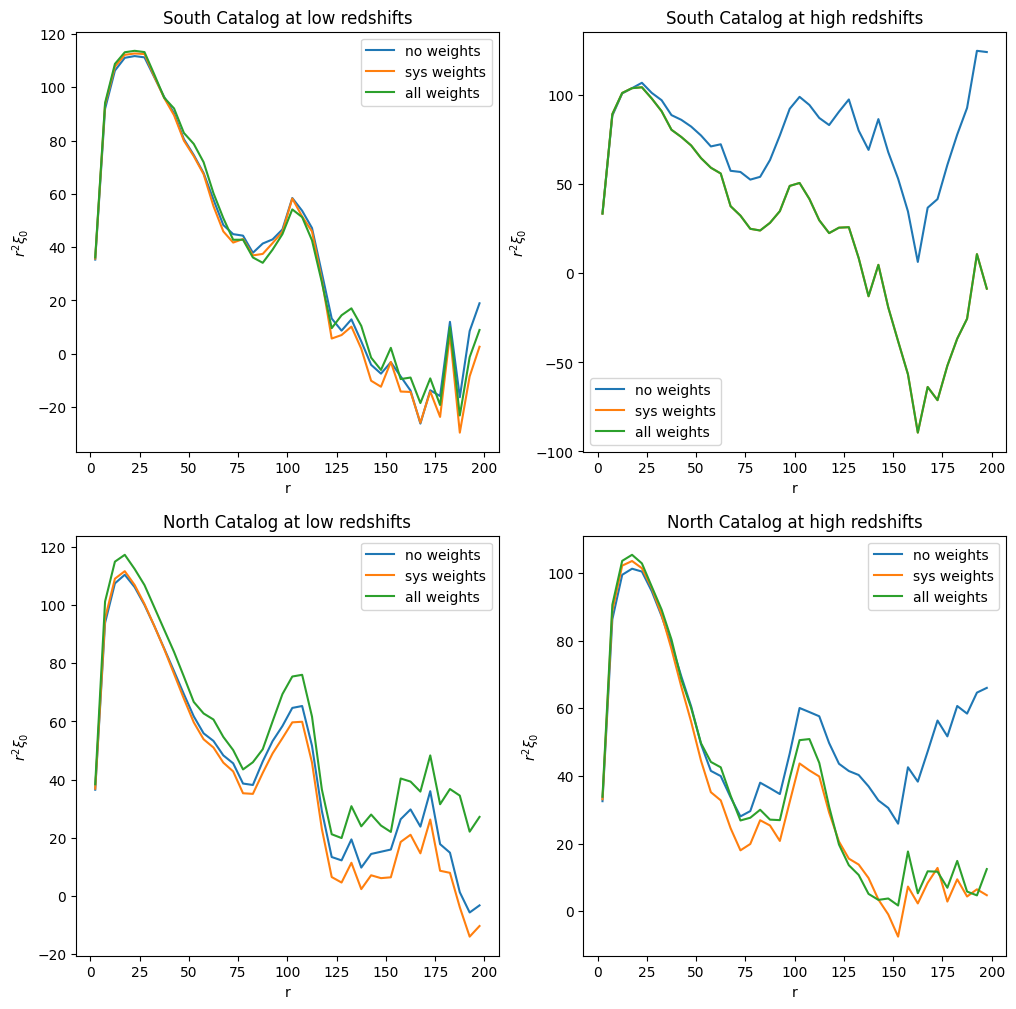

In [7]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].plot(r_none_low_S, r_none_low_S**2*xi0_none_low_S, label = 'no weights')
ax[0,0].plot(r_sys_low_S, r_sys_low_S**2*xi0_sys_low_S, label = 'sys weights')
ax[0,0].plot(r_tot_low_S, r_tot_low_S**2*xi0_tot_low_S, label = 'all weights')
ax[0,0].set_title('South Catalog at low redshifts')
ax[0,0].set_xlabel('r')
ax[0,0].set_ylabel(r'$r^2 \xi_{0}$ ')
ax[0,0].legend()
ax[0,1].plot(r_none_high_S, r_none_high_S**2*xi0_none_high_S, label = 'no weights')
ax[0,1].plot(r_sys_high_S, r_sys_high_S**2*xi0_sys_high_S, label = 'sys weights')
ax[0,1].plot(r_tot_high_S, r_tot_high_S**2*xi0_tot_high_S, label = 'all weights')
ax[0,1].set_title('South Catalog at high redshifts')
ax[0,1].set_xlabel('r')
ax[0,1].set_ylabel(r'$r^2 \xi_{0}$ ')
ax[0,1].legend()
ax[1,0].plot(r_none_low_N, r_none_low_N**2*xi0_none_low_N, label = 'no weights')
ax[1,0].plot(r_sys_low_N, r_sys_low_N**2*xi0_sys_low_N, label = 'sys weights')
ax[1,0].plot(r_tot_low_N, r_tot_low_N**2*xi0_tot_low_N, label = 'all weights')
ax[1,0].set_title('North Catalog at low redshifts')
ax[1,0].set_xlabel('r')
ax[1,0].set_ylabel(r'$r^2 \xi_{0}$ ')
ax[1,0].legend()
ax[1,1].plot(r_none_high_N, r_none_high_N**2*xi0_none_high_N, label = 'no weights')
ax[1,1].plot(r_sys_high_N, r_sys_high_N**2*xi0_sys_high_N, label = 'sys weights')
ax[1,1].plot(r_tot_high_N, r_tot_high_N**2*xi0_tot_high_N, label = 'all weights')
ax[1,1].set_title('North Catalog at high redshifts')
ax[1,1].set_xlabel('r')
ax[1,1].set_ylabel(r'$r^2 \xi_{0}$ ')
ax[1,1].legend()

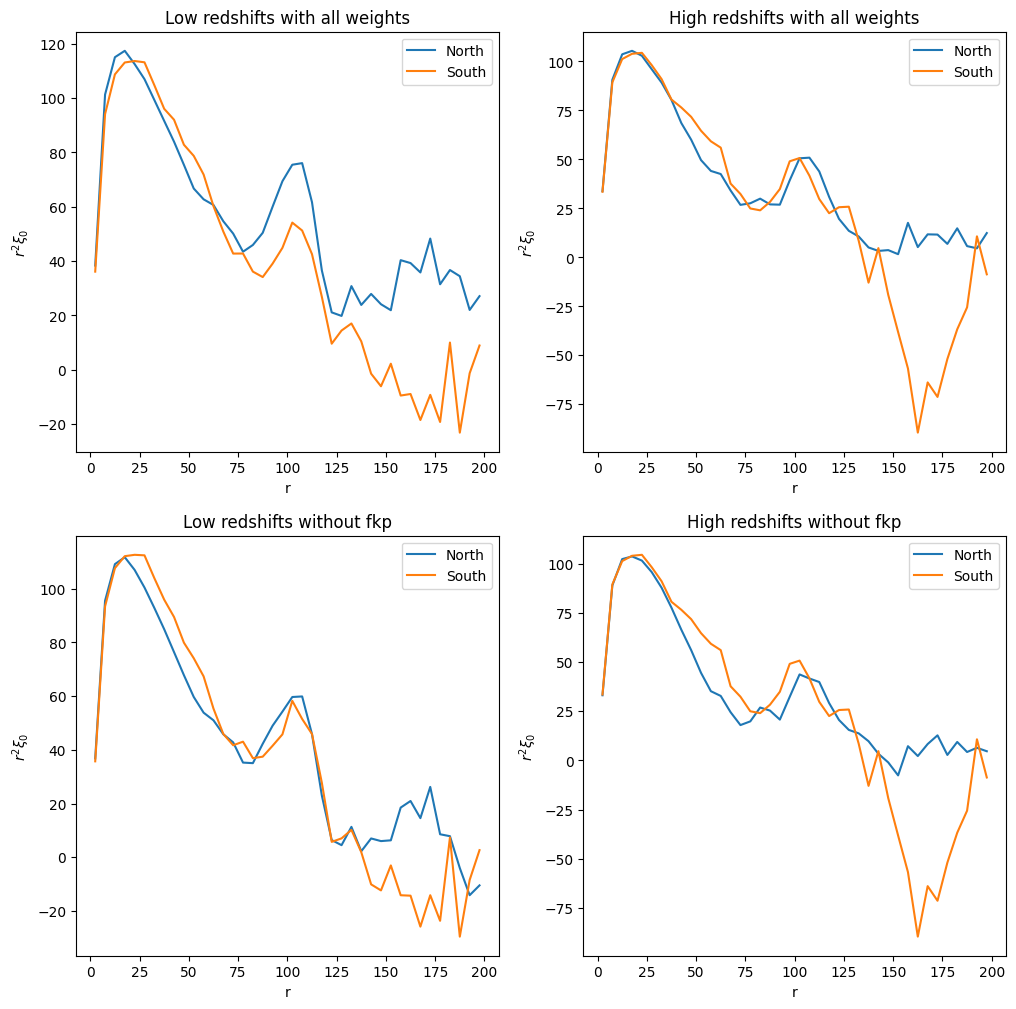

In [8]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].plot(r_tot_low_N, r_tot_low_N**2*xi0_tot_low_N, label = 'North')
ax[0,0].plot(r_tot_low_S, r_tot_low_S**2*xi0_tot_low_S, label = 'South')
ax[0,0].set_title('Low redshifts with all weights')
ax[0,0].set_xlabel('r')
ax[0,0].set_ylabel(r'$r^2 \xi_{0}$ ')
ax[0,0].legend()
ax[0,1].plot(r_tot_high_N, r_tot_high_N**2*xi0_tot_high_N, label = 'North')
ax[0,1].plot(r_tot_high_S, r_tot_high_S**2*xi0_tot_high_S, label = 'South')
ax[0,1].set_title('High redshifts with all weights')
ax[0,1].set_xlabel('r')
ax[0,1].set_ylabel(r'$r^2 \xi_{0}$ ')
ax[0,1].legend()
ax[1,0].plot(r_sys_low_N, r_sys_low_N**2*xi0_sys_low_N, label = 'North')
ax[1,0].plot(r_sys_low_S, r_sys_low_S**2*xi0_sys_low_S, label = 'South')
ax[1,0].set_title('Low redshifts without fkp')
ax[1,0].set_xlabel('r')
ax[1,0].set_ylabel(r'$r^2 \xi_{0}$ ')
ax[1,0].legend()
ax[1,1].plot(r_sys_high_N, r_sys_high_N**2*xi0_sys_high_N, label = 'North')
ax[1,1].plot(r_sys_high_S, r_sys_high_S**2*xi0_sys_high_S, label = 'South')
ax[1,1].set_title('High redshifts without fkp')
ax[1,1].set_xlabel('r')
ax[1,1].set_ylabel(r'$r^2 \xi_{0}$ ')
ax[1,1].legend()

I compare my results with the ones in the BOSS paper Satpathy et al. 2016. I do it for the two redshifts binnings (z1 and z3 for Satpathy)

# BOSS RESULTS at low redshifts

In [9]:
filename = '/farmdisk1/lentini/Work/Project/xi/BOSS_results/Satpathy_2016_COMBINEDDR12_Bin1_Monopole_pre_recon.dat'

data  = np.loadtxt(filename, skiprows=30)
r_boss_low = data[:,0]
xi0_boss_low = data[:,1]

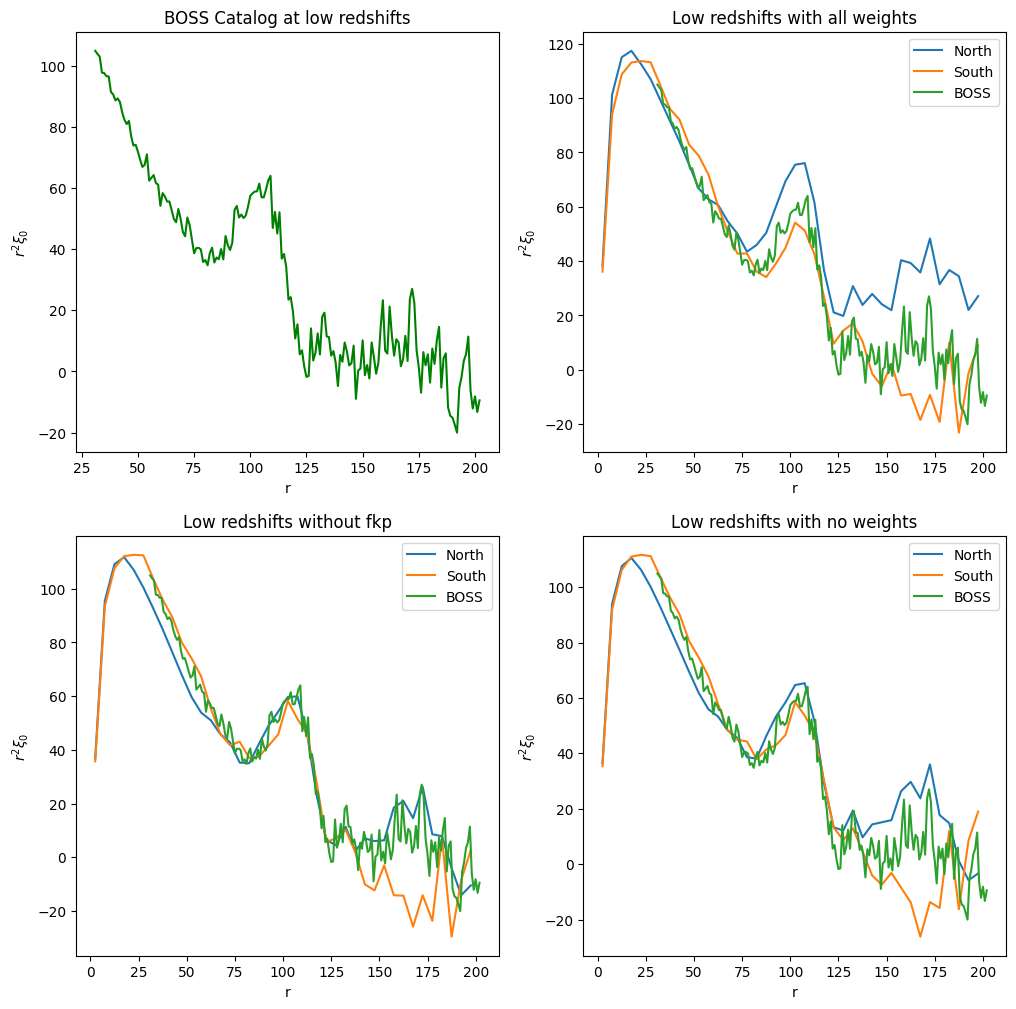

In [10]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].plot(r_boss_low,xi0_boss_low*r_boss_low**2,'g')
ax[0,0].set_title('BOSS Catalog at low redshifts')
ax[0,0].set_xlabel('r')
ax[0,0].set_ylabel(r'$r^2 \xi_{0}$ ')
ax[0,1].plot(r_tot_low_N, r_tot_low_N**2*xi0_tot_low_N, label = 'North')
ax[0,1].plot(r_tot_low_S, r_tot_low_S**2*xi0_tot_low_S, label = 'South')
ax[0,1].plot(r_boss_low,xi0_boss_low*r_boss_low**2,label='BOSS')
ax[0,1].set_title('Low redshifts with all weights')
ax[0,1].set_xlabel('r')
ax[0,1].set_ylabel(r'$r^2 \xi_{0}$ ')
ax[0,1].legend()
ax[1,0].plot(r_sys_low_N, r_sys_low_N**2*xi0_sys_low_N, label = 'North')
ax[1,0].plot(r_sys_low_S, r_sys_low_S**2*xi0_sys_low_S, label = 'South')
ax[1,0].plot(r_boss_low,xi0_boss_low*r_boss_low**2,label='BOSS')
ax[1,0].set_title('Low redshifts without fkp')
ax[1,0].set_xlabel('r')
ax[1,0].set_ylabel(r'$r^2 \xi_{0}$ ')
ax[1,0].legend()
ax[1,1].plot(r_none_low_N, r_none_low_N**2*xi0_none_low_N, label = 'North')
ax[1,1].plot(r_none_low_S, r_none_low_S**2*xi0_none_low_S, label = 'South')
ax[1,1].plot(r_boss_low,xi0_boss_low*r_boss_low**2, label='BOSS')
ax[1,1].set_title('Low redshifts with no weights')
ax[1,1].set_xlabel('r')
ax[1,1].set_ylabel(r'$r^2 \xi_{0}$ ')
ax[1,1].legend()

# BOSS results at high redshifts

In [11]:
filename = '/farmdisk1/lentini/Work/Project/xi/BOSS_results/Satpathy_2016_COMBINEDDR12_Bin3_Monopole_pre_recon.dat'

data  = np.loadtxt(filename, skiprows=30)
r_boss_high = data[:,0]
xi0_boss_high = data[:,1]

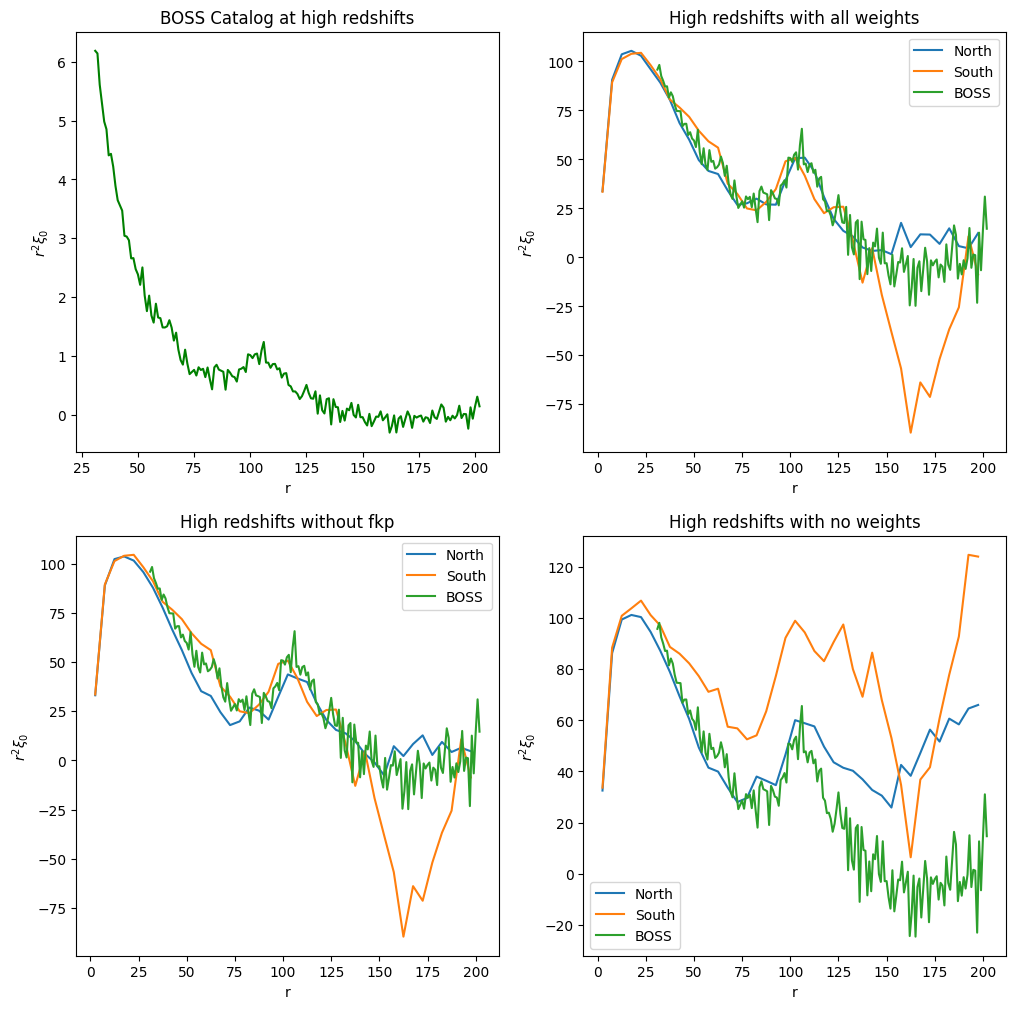

In [12]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].plot(r_boss_high,xi0_boss_high*r_boss_high*2,'g')
ax[0,0].set_title('BOSS Catalog at high redshifts')
ax[0,0].set_xlabel('r')
ax[0,0].set_ylabel(r'$r^2 \xi_{0}$ ')
ax[0,1].plot(r_tot_high_N, r_tot_high_N**2*xi0_tot_high_N, label = 'North')
ax[0,1].plot(r_tot_high_S, r_tot_high_S**2*xi0_tot_high_S, label = 'South')
ax[0,1].plot(r_boss_high,xi0_boss_high*r_boss_high**2,label='BOSS')
ax[0,1].set_title('High redshifts with all weights')
ax[0,1].set_xlabel('r')
ax[0,1].set_ylabel(r'$r^2 \xi_{0}$ ')
ax[0,1].legend()
ax[1,0].plot(r_sys_high_N, r_sys_high_N**2*xi0_sys_high_N, label = 'North')
ax[1,0].plot(r_sys_high_S, r_sys_high_S**2*xi0_sys_high_S, label = 'South')
ax[1,0].plot(r_boss_high,xi0_boss_high*r_boss_high**2,label='BOSS')
ax[1,0].set_title('High redshifts without fkp')
ax[1,0].set_xlabel('r')
ax[1,0].set_ylabel(r'$r^2 \xi_{0}$ ')
ax[1,0].legend()
ax[1,1].plot(r_none_high_N, r_none_high_N**2*xi0_none_high_N, label = 'North')
ax[1,1].plot(r_none_high_S, r_none_high_S**2*xi0_none_high_S, label = 'South')
ax[1,1].plot(r_boss_high,xi0_boss_high*r_boss_high**2, label='BOSS')
ax[1,1].set_title('High redshifts with no weights')
ax[1,1].set_xlabel('r')
ax[1,1].set_ylabel(r'$r^2 \xi_{0}$ ')
ax[1,1].legend()

In the BOSS paper South and North are merged. To better analyse my results I also merge my xi. I also add the error bars using the covariance. The covariance of my xi has been compute by Claudio. I plot the results only for r in [30,150] with a bin size of 5 Mpc/h as in BOSS paper. I do it only forthe xi with no weights and with all weights (including fkp as in the paper)

# merge north and south only for no weights and all weights

In [13]:
def xi_2(xml_file):
    for file in xml_file:
        Product_TwoPoint = pr.DpdLE3GCReader()
        Product_TwoPoint.parse_xml(file)
        Product_TwoPoint.read_tables()
        file_name=Product_TwoPoint.CorrelationMultipole.header['D_NAME'].removesuffix('.fits')

        bin2num=Product_TwoPoint.Pairs.header["BIN2NUM"]
        bin1num=Product_TwoPoint.Pairs.header["BIN1NUM"]

        
        pair_DD=Product_TwoPoint.Pairs.header["PAIR_DD"]
        pair_RR=Product_TwoPoint.Pairs.header["PAIR_RR"]
        pair_DR=Product_TwoPoint.Pairs.header["PAIR_DR"]

        DD = np.reshape(Product_TwoPoint.Pairs.table["DD"], newshape=(bin1num,bin2num))
        DR = np.reshape(Product_TwoPoint.Pairs.table["DR"], newshape=(bin1num,bin2num))
        RR = np.reshape(Product_TwoPoint.Pairs.table["RR"], newshape=(bin1num,bin2num))

        r = Product_TwoPoint.CorrelationMultipole.table['SCALE']
        mu = np.array(Product_TwoPoint.Correlation.table['SCALE_2D']).reshape(bin1num, bin2num)
        xi2D = np.array(Product_TwoPoint.Correlation.table['XI']).reshape(bin1num,bin2num)
        xi0 = Product_TwoPoint.CorrelationMultipole.table['XI0']      
        xi2 = Product_TwoPoint.CorrelationMultipole.table['XI2']
        xi4 = Product_TwoPoint.CorrelationMultipole.table['XI4']
       
        #RR_n = RR/pair_RR

    return r,xi2D, RR,mu

In [14]:
#South low

pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_South/low/EUC_LE3_GCL_2PCF_BOSS_SOUTH_low_none_Correlation_AUTO_2DPOL_809DB0C6504B_20240706T105737.0Z.xml'
xml_file = glob.glob(pathname)
print(xml_file)
r_none_low_S,xi2D_none_low_S, RR_none_low_S,mu = xi_2(xml_file)

pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_South/low/EUC_LE3_GCL_2PCF_BOSS_SOUTH_low_totfkp_Correlation_AUTO_2DPOL_7D4740367B95_20240715T115701.0Z.xml'
xml_file = glob.glob(pathname)
print(xml_file)
r_tot_low_S,xi2D_tot_low_S,RR_tot_low_S,mu = xi_2(xml_file)

['/farmdisk1/lentini/Work/Project/xi/BOSS_South/low/EUC_LE3_GCL_2PCF_BOSS_SOUTH_low_none_Correlation_AUTO_2DPOL_809DB0C6504B_20240706T105737.0Z.xml']
['/farmdisk1/lentini/Work/Project/xi/BOSS_South/low/EUC_LE3_GCL_2PCF_BOSS_SOUTH_low_totfkp_Correlation_AUTO_2DPOL_7D4740367B95_20240715T115701.0Z.xml']


In [15]:
#South high

pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_South/high/EUC_LE3_GCL_2PCF_BOSS_SOUTH_high_none_Correlation_AUTO_2DPOL_63ADBD4FCB74_20240706T101503.0Z.xml'
xml_file= glob.glob(pathname)
print(xml_file)
r_none_high_S,xi2D_none_high_S,RR_none_high_S,mu = xi_2(xml_file)

pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_South/high/EUC_LE3_GCL_2PCF_BOSS_SOUTH_high_totfkp_Correlation_AUTO_2DPOL_5A8851860C82_20240715T115530.0Z.xml'
xml_file = glob.glob(pathname)
print(xml_file)
r_tot_high_S,xi2D_tot_high_S, RR_tot_high_S,mu = xi_2(xml_file)

['/farmdisk1/lentini/Work/Project/xi/BOSS_South/high/EUC_LE3_GCL_2PCF_BOSS_SOUTH_high_none_Correlation_AUTO_2DPOL_63ADBD4FCB74_20240706T101503.0Z.xml']
['/farmdisk1/lentini/Work/Project/xi/BOSS_South/high/EUC_LE3_GCL_2PCF_BOSS_SOUTH_high_totfkp_Correlation_AUTO_2DPOL_5A8851860C82_20240715T115530.0Z.xml']


In [16]:
#North low

pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_North/low/EUC_LE3_GCL_2PCF_BOSS_NORTH_low_none_Correlation_AUTO_2DPOL_DC2C51121E48_20240706T112852.0Z.xml'
xml_file = glob.glob(pathname)
print(xml_file)
r_none_low_N,xi2D_none_low_N,RR_none_low_N,mu = xi_2(xml_file)

pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_North/low/EUC_LE3_GCL_2PCF_BOSS_NORTH_low_totfkp_Correlation_AUTO_2DPOL_B0406027C0F8_20240710T161910.0Z.xml'
xml_file = glob.glob(pathname)
print(xml_file)
r_tot_low_N,xi2D_tot_low_N, RR_tot_low_N,mu = xi_2(xml_file)


['/farmdisk1/lentini/Work/Project/xi/BOSS_North/low/EUC_LE3_GCL_2PCF_BOSS_NORTH_low_none_Correlation_AUTO_2DPOL_DC2C51121E48_20240706T112852.0Z.xml']
['/farmdisk1/lentini/Work/Project/xi/BOSS_North/low/EUC_LE3_GCL_2PCF_BOSS_NORTH_low_totfkp_Correlation_AUTO_2DPOL_B0406027C0F8_20240710T161910.0Z.xml']


In [17]:
#North high

pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_North/high/EUC_LE3_GCL_2PCF_BOSS_NORTH_high_none_Correlation_AUTO_2DPOL_87D972513CE2_20240706T123429.0Z.xml'
xml_file= glob.glob(pathname)
print(xml_file)
r_none_high_N,xi2D_none_high_N,RR_none_high_N,mu = xi_2(xml_file)

pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_North/high/EUC_LE3_GCL_2PCF_BOSS_NORTH_high_totfkp_Correlation_AUTO_2DPOL_5D874710C7E3_20240710T162004.0Z.xml'
xml_file = glob.glob(pathname)
print(xml_file)
r_tot_high_N,xi2D_tot_high_N, RR_tot_high_N, mu = xi_2(xml_file)

['/farmdisk1/lentini/Work/Project/xi/BOSS_North/high/EUC_LE3_GCL_2PCF_BOSS_NORTH_high_none_Correlation_AUTO_2DPOL_87D972513CE2_20240706T123429.0Z.xml']
['/farmdisk1/lentini/Work/Project/xi/BOSS_North/high/EUC_LE3_GCL_2PCF_BOSS_NORTH_high_totfkp_Correlation_AUTO_2DPOL_5D874710C7E3_20240710T162004.0Z.xml']


In [18]:
xi_tot_none_low = (xi2D_none_low_S*RR_none_low_S+xi2D_none_low_N*RR_none_low_N)/(RR_none_low_N+RR_none_low_S)
xi_tot_none_high = (xi2D_none_high_S*RR_none_high_S+xi2D_none_high_N*RR_none_high_N)/(RR_none_high_N+RR_none_high_S)

xi_tot_low = (xi2D_tot_low_S*RR_tot_low_S+xi2D_tot_low_N*RR_tot_low_N)/(RR_tot_low_N+RR_tot_low_S)
xi_tot_high = (xi2D_tot_high_S*RR_tot_high_S+xi2D_tot_high_N*RR_tot_high_N)/(RR_tot_high_N+RR_tot_high_S)

In [19]:
def multipole_from_xi2D(xi2D, mu, l=0):
    """
    
    Parameters
    ----------
    xi2D : 2D array
        2D correlation function.
    mu : 2D array
        2D array of mu values.
    l : int
        Multipole order.
        
    Returns
    -------
        array
        Multipole.
        
        """
    multipole = []
    dmu=mu[0][1]-mu[0][0]                        ## measure of the mu bin assuming dmu is constant forall r, mu
    for i in range(0, len(xi2D)):
        P_l=eval_legendre(l,mu[i,:])   
        appo=np.array(xi2D[i]*P_l)                   ##the product is element-wise
        multipole.append(appo)
    multipole = 0.5*(2*l+1)*dmu*np.array(multipole).sum(axis=1)     

    return np.array(multipole)

# Monopole

In [20]:
xi0_tot_none_low = multipole_from_xi2D(xi_tot_none_low, mu, 0)
xi0_tot_none_high = multipole_from_xi2D(xi_tot_none_high, mu, 0)

xi0_tot_low = multipole_from_xi2D(xi_tot_low, mu, 0)
xi0_tot_high = multipole_from_xi2D(xi_tot_high, mu, 0)


In [21]:
#Claudio's covariance

cov_z1 = np.load('/farmdisk1/lentini/Work/Project/Covariance_matrix/cov_xi_z1.npy')
cov_z2 = np.load('/farmdisk1/lentini/Work/Project/Covariance_matrix/cov_xi_z3.npy')

std_z1 = np.sqrt(np.diag(cov_z1))
std_z2 = np.sqrt(np.diag(cov_z2))

#I take only the variables related to the monopole 
std_z1 = std_z1[:len(xi0_tot_none_low)] 
std_z2 = std_z2[:len(xi0_tot_none_high)]

print(std_z1.shape)
print(xi0_tot_none_low.shape)

(40,)
(40,)


In [22]:
print(xi0_boss_high.shape)
print(r_boss_high)
print(r_tot_low_N)

(172,)
[ 31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.
  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.
  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.
  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100.
 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114.
 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127. 128.
 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142.
 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 156.
 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170.
 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184.
 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196. 197. 198.
 199. 200. 201. 202.]
0       2.5
1       7.5
2      12.5
3      17.5
4      22.5
5      27.5
6      32.5
7      37.5
8      42.5
9      47.5

I want a bin size of 5 Mpc/h for the BOSS measurements

In [23]:
j = 1 #r=32
r_boss_high_n = []
xi0_boss_high_n = []
xi0_boss_low_n = []

for i in range (0,len(r_boss_high)):
    if i == j and r_boss_high[i]<=150: 
        xi0_boss_high_n = np.append(xi0_boss_high_n, xi0_boss_high[i])
        r_boss_high_n = np.append(r_boss_high_n,r_boss_high[i])
        xi0_boss_low_n = np.append(xi0_boss_low_n,xi0_boss_low[i])
        j = j+5

print(r_boss_high_n)
print(r_boss_high_n.size)

[ 32.  37.  42.  47.  52.  57.  62.  67.  72.  77.  82.  87.  92.  97.
 102. 107. 112. 117. 122. 127. 132. 137. 142. 147.]
24


In [24]:
#BOSS covariance

cov_z1_B = '/farmdisk1/lentini/Work/Project/xi/BOSS_results/Satpathy_2016_COMBINEDDR12_Bin1_Covariance_pre_recon.txt'
cov_z2_B ='/farmdisk1/lentini/Work/Project/xi/BOSS_results/Satpathy_2016_COMBINEDDR12_Bin3_CovarianceMatrix_pre_recon.txt'

data1  = np.loadtxt(cov_z1_B)
data2  = np.loadtxt(cov_z2_B)
print(data1.shape)

std_z1_B = np.sqrt(np.diag(data1))
std_z2_B = np.sqrt(np.diag(data2))

#I take only the variables related to the monopole for r in [30,150]
std_z1_B = std_z1_B[:24]
std_z2_B = std_z2_B[:24]

print(std_z1_B.shape)

(48, 48)
(24,)


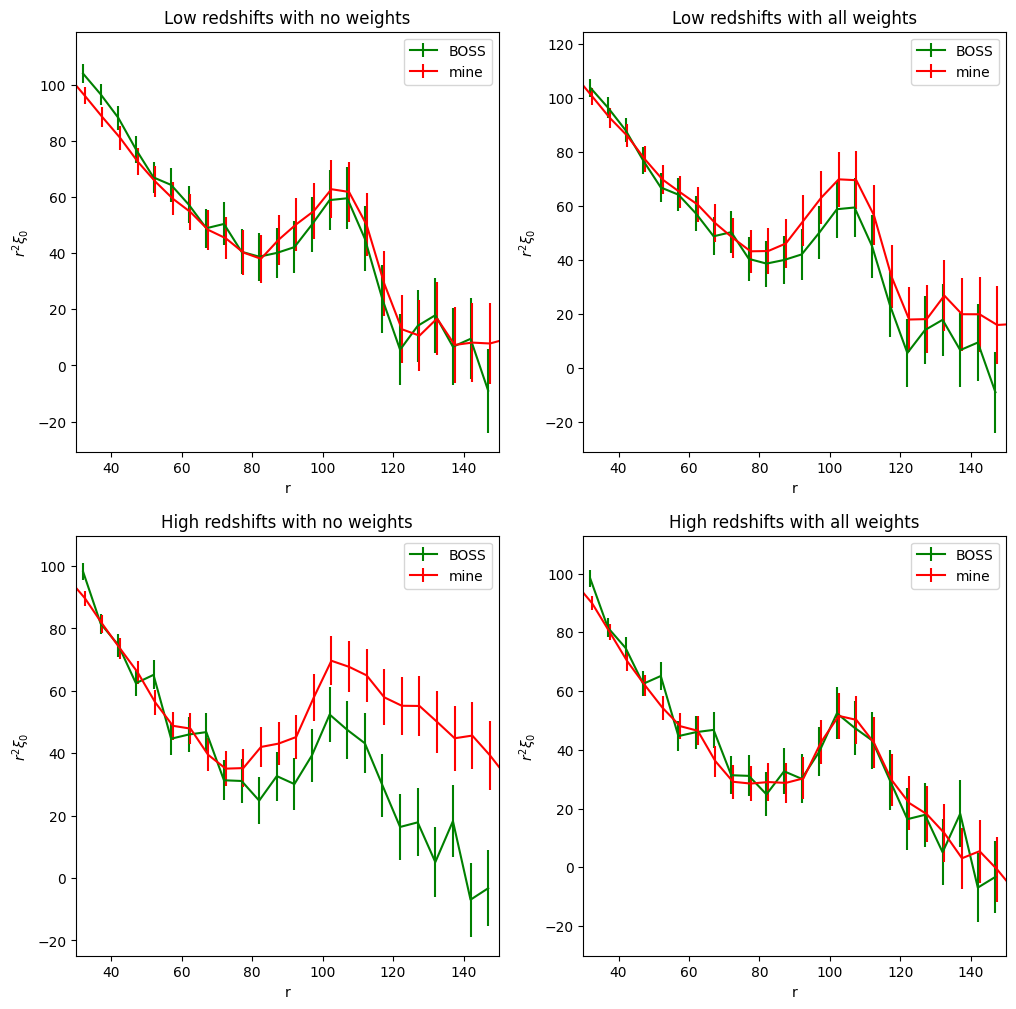

In [25]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].errorbar(r_boss_high_n,xi0_boss_low_n*r_boss_high_n**2, yerr= r_boss_high_n**2*std_z1_B,color='g',label='BOSS')
ax[0,0].errorbar(r_tot_low_N, r_tot_low_N**2*xi0_tot_none_low, yerr= r_tot_low_N**2*std_z1,color='r',label = 'mine')
ax[0,0].set_title('Low redshifts with no weights')
ax[0,0].set_xlabel('r')
ax[0,0].set_ylabel(r'$r^2 \xi_{0}$ ')
ax[0,0].set_xlim([30,150])
ax[0,0].legend()
ax[0,1].errorbar(r_boss_high_n,xi0_boss_low_n*r_boss_high_n**2,yerr= r_boss_high_n**2*std_z1_B,color='g',label='BOSS')
ax[0,1].errorbar(r_tot_low_N, r_tot_low_N**2*xi0_tot_low,yerr= r_tot_low_N**2*std_z1,color='r', label = 'mine')
ax[0,1].set_title('Low redshifts with all weights')
ax[0,1].set_xlabel('r')
ax[0,1].set_ylabel(r'$r^2 \xi_{0}$ ')
ax[0,1].set_xlim([30,150])
ax[0,1].legend()
ax[1,0].errorbar(r_boss_high_n,xi0_boss_high_n*r_boss_high_n**2,yerr= r_boss_high_n**2*std_z2_B,color='g',label='BOSS')
ax[1,0].errorbar(r_tot_high_N, r_tot_high_N**2*xi0_tot_none_high, yerr= r_tot_high_N**2*std_z2,color='r',label = 'mine')
ax[1,0].set_title('High redshifts with no weights')
ax[1,0].set_xlabel('r')
ax[1,0].set_ylabel(r'$r^2 \xi_{0}$ ')
ax[1,0].set_xlim([30,150])
ax[1,0].legend()
ax[1,1].errorbar(r_boss_high_n,xi0_boss_high_n*r_boss_high_n**2,yerr= r_boss_high_n**2*std_z2_B,color='g' ,label='BOSS')
ax[1,1].errorbar(r_tot_high_N, r_tot_high_N**2*xi0_tot_high,yerr= r_tot_high_N**2*std_z2,color='r', label = 'mine')
ax[1,1].set_title('High redshifts with all weights')
ax[1,1].set_xlabel('r')
ax[1,1].set_ylabel(r'$r^2 \xi_{0}$ ')
ax[1,1].set_xlim([30,150])
ax[1,1].legend()

# Quadrupole

In [26]:
filename = '/farmdisk1/lentini/Work/Project/xi/BOSS_results/Satpathy_2016_COMBINEDDR12_Bin1_Quadrupole_pre_recon.dat'

data  = np.loadtxt(filename, skiprows=30)
r_boss_low = data[:,0]
xi2_boss_low = data[:,1]

In [27]:
filename = '/farmdisk1/lentini/Work/Project/xi/BOSS_results/Satpathy_2016_COMBINEDDR12_Bin3_Quadrupole_pre_recon.dat'

data  = np.loadtxt(filename, skiprows=30)
r_boss_high = data[:,0]
xi2_boss_high = data[:,1]

In [28]:
xi2_tot_none_low = multipole_from_xi2D(xi_tot_none_low, mu, 2)
xi2_tot_none_high = multipole_from_xi2D(xi_tot_none_high, mu, 2)

xi2_tot_low = multipole_from_xi2D(xi_tot_low, mu, 2)
xi2_tot_high = multipole_from_xi2D(xi_tot_high, mu, 2)

In [29]:
#Claudio's covariance

cov_z1 = np.load('/farmdisk1/lentini/Work/Project/Covariance_matrix/cov_xi_z1.npy')
cov_z2 = np.load('/farmdisk1/lentini/Work/Project/Covariance_matrix/cov_xi_z3.npy')

std2_z1 = np.sqrt(np.diag(cov_z1))
std2_z2 = np.sqrt(np.diag(cov_z2))

#I take only the variables related to the quadrupole 
std2_z1 = std2_z1[len(xi0_tot_none_low):] 
std2_z2 = std2_z2[len(xi0_tot_none_high):]

print(std2_z1.shape)
print(xi2_tot_none_low.shape)

(40,)
(40,)


In [30]:
j = 1 #r=32
r_boss_high_n = []
xi2_boss_high_n = []
xi2_boss_low_n = []

for i in range (0,len(r_boss_high)):
    if i == j and r_boss_high[i]<=150: 
        xi2_boss_high_n = np.append(xi2_boss_high_n, xi2_boss_high[i])
        r_boss_high_n = np.append(r_boss_high_n,r_boss_high[i])
        xi2_boss_low_n = np.append(xi2_boss_low_n,xi2_boss_low[i])
        j = j+5

print(r_boss_high_n)
print(r_boss_high_n.size)

[ 32.  37.  42.  47.  52.  57.  62.  67.  72.  77.  82.  87.  92.  97.
 102. 107. 112. 117. 122. 127. 132. 137. 142. 147.]
24


In [31]:
#BOSS covariance

cov_z1_B = '/farmdisk1/lentini/Work/Project/xi/BOSS_results/Satpathy_2016_COMBINEDDR12_Bin1_Covariance_pre_recon.txt'
cov_z2_B ='/farmdisk1/lentini/Work/Project/xi/BOSS_results/Satpathy_2016_COMBINEDDR12_Bin3_CovarianceMatrix_pre_recon.txt'

data1  = np.loadtxt(cov_z1_B)
data2  = np.loadtxt(cov_z2_B)
print(data1.shape)

std2_z1_B = np.sqrt(np.diag(data1))
std2_z2_B = np.sqrt(np.diag(data2))

#I take only the variables related to the quadrupole for r in [30,150]
std2_z1_B = std2_z1_B[24:]
std2_z2_B = std2_z2_B[24:]

print(std2_z1_B.shape)

(48, 48)
(24,)


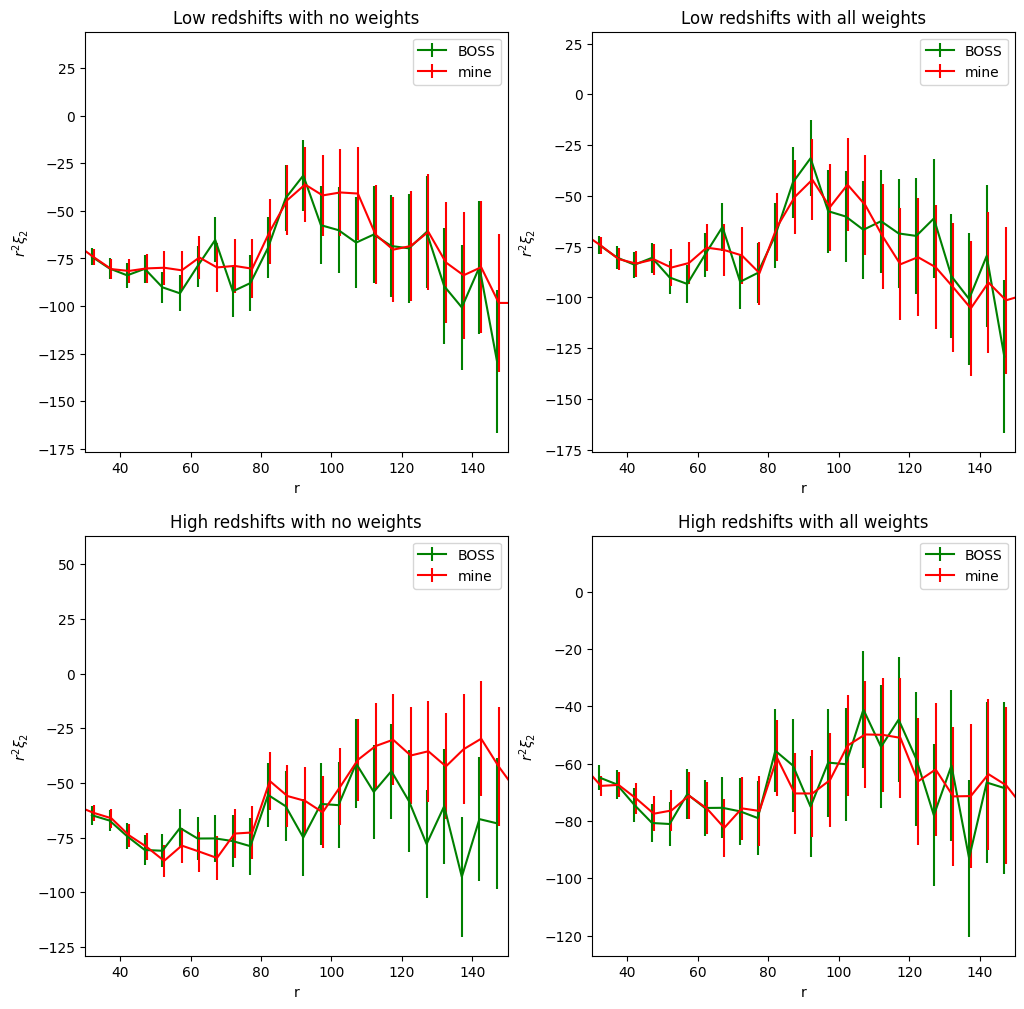

In [32]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].errorbar(r_boss_high_n,xi2_boss_low_n*r_boss_high_n**2, yerr= r_boss_high_n**2*std2_z1_B,color='g',label='BOSS')
ax[0,0].errorbar(r_tot_low_N, r_tot_low_N**2*xi2_tot_none_low, yerr= r_tot_low_N**2*std2_z1,color='r',label = 'mine')
ax[0,0].set_title('Low redshifts with no weights')
ax[0,0].set_xlabel('r')
ax[0,0].set_ylabel(r'$r^2 \xi_{2}$ ')
ax[0,0].set_xlim([30,150])
ax[0,0].legend()
ax[0,1].errorbar(r_boss_high_n,xi2_boss_low_n*r_boss_high_n**2,yerr= r_boss_high_n**2*std2_z1_B,color='g',label='BOSS')
ax[0,1].errorbar(r_tot_low_N, r_tot_low_N**2*xi2_tot_low,yerr= r_tot_low_N**2*std2_z1,color='r', label = 'mine')
ax[0,1].set_title('Low redshifts with all weights')
ax[0,1].set_xlabel('r')
ax[0,1].set_ylabel(r'$r^2 \xi_{2}$ ')
ax[0,1].set_xlim([30,150])
ax[0,1].legend()
ax[1,0].errorbar(r_boss_high_n,xi2_boss_high_n*r_boss_high_n**2,yerr= r_boss_high_n**2*std2_z2_B,color='g',label='BOSS')
ax[1,0].errorbar(r_tot_high_N, r_tot_high_N**2*xi2_tot_none_high, yerr= r_tot_high_N**2*std2_z2,color='r',label = 'mine')
ax[1,0].set_title('High redshifts with no weights')
ax[1,0].set_xlabel('r')
ax[1,0].set_ylabel(r'$r^2 \xi_{2}$ ')
ax[1,0].set_xlim([30,150])
ax[1,0].legend()
ax[1,1].errorbar(r_boss_high_n,xi2_boss_high_n*r_boss_high_n**2,yerr= r_boss_high_n**2*std2_z2_B,color='g' ,label='BOSS')
ax[1,1].errorbar(r_tot_high_N, r_tot_high_N**2*xi2_tot_high,yerr= r_tot_high_N**2*std2_z2,color='r', label = 'mine')
ax[1,1].set_title('High redshifts with all weights')
ax[1,1].set_xlabel('r')
ax[1,1].set_ylabel(r'$r^2 \xi_{2}$ ')
ax[1,1].set_xlim([30,150])
ax[1,1].legend()

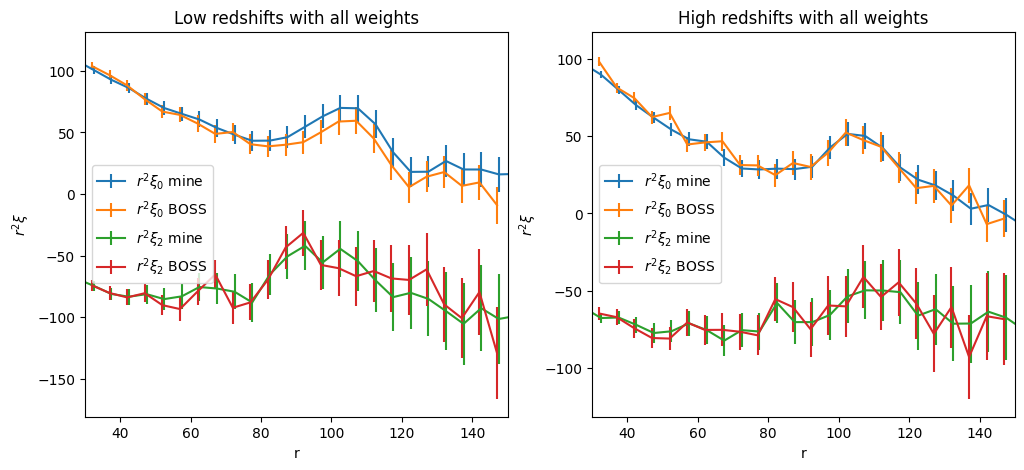

In [35]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
ax[0].errorbar(r_tot_low_N, r_tot_low_N**2*xi0_tot_low,yerr= r_tot_low_N**2*std_z1, label = r'$r^2 \xi_{0}$ mine')
ax[0].errorbar(r_boss_high_n,xi0_boss_low_n*r_boss_high_n**2,yerr= r_boss_high_n**2*std_z1_B,label=r'$r^2 \xi_{0}$ BOSS')
ax[0].errorbar(r_tot_low_N, r_tot_low_N**2*xi2_tot_low,yerr= r_tot_low_N**2*std2_z1, label = r'$r^2 \xi_{2}$ mine')
ax[0].errorbar(r_boss_high_n,xi2_boss_low_n*r_boss_high_n**2,yerr= r_boss_high_n**2*std2_z1_B,label=r'$r^2 \xi_{2}$ BOSS')
ax[0].set_title('Low redshifts with all weights')
ax[0].set_xlabel('r')
ax[0].set_ylabel(r'$r^2 \xi$ ')
ax[0].set_xlim([30,150])
ax[0].legend()
ax[1].errorbar(r_tot_high_N, r_tot_high_N**2*xi0_tot_high,yerr= r_tot_high_N**2*std_z2, label = r'$r^2 \xi_{0}$ mine')
ax[1].errorbar(r_boss_high_n,xi0_boss_high_n*r_boss_high_n**2,yerr= r_boss_high_n**2*std_z2_B ,label=r'$r^2 \xi_{0}$ BOSS ')
ax[1].errorbar(r_tot_high_N, r_tot_high_N**2*xi2_tot_high,yerr= r_tot_high_N**2*std2_z2, label = r'$r^2 \xi_{2}$ mine') 
ax[1].errorbar(r_boss_high_n,xi2_boss_high_n*r_boss_high_n**2,yerr= r_boss_high_n**2*std2_z2_B,label=r'$r^2 \xi_{2}$ BOSS')
ax[1].set_title('High redshifts with all weights')
ax[1].set_xlabel('r')
ax[1].set_ylabel(r'$r^2 \xi$ ')
ax[1].set_xlim([30,150])
ax[1].legend()



In [34]:
np.save('/farmdisk1/lentini/Work/Project/xi/exam_xi/xi0_tot_low',xi0_tot_low)
np.save('/farmdisk1/lentini/Work/Project/xi/exam_xi/xi0_tot_high',xi0_tot_high)
np.save('/farmdisk1/lentini/Work/Project/xi/exam_xi/xi2_tot_low',xi2_tot_low)
np.save('/farmdisk1/lentini/Work/Project/xi/exam_xi/xi2_tot_high',xi2_tot_high)
np.save('/farmdisk1/lentini/Work/Project/xi/exam_xi/r',r_tot_high_N)